In [2]:
import csv
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('final_data.csv')
#reads the values of the sentiment and loads into df

In [4]:
df=df.dropna()
df=df.set_index(['Unnamed: 0'])

In [5]:
df['follower_count']=df['follower_count']/1000000


In [6]:
df['Positive']=df['Positive']*1000
df['Negative']=df['Negative']*1000
df['Anticipation']=df['Anticipation']*1000
df['Disgust']=df['Disgust']*1000
df['Fear']=df['Fear']*1000
df['Joy']=df['Joy']*1000
df['Sadness']=df['Sadness']*1000
df['Surprise']=df['Surprise']*1000
df['Trust']=df['Trust']*1000

In [7]:
pd.options.display.max_columns=11
df.describe()

,Anticipation,Disgust,Fear,Joy,Negative,Positive,Sadness,Surprise,Trust,follower_count,Pct_change
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,10.488975,1.702832,4.964858,4.616569,9.353808,13.891621,3.940987,3.652298,9.813697,14.140550,-0.001188
std,3.206982,1.016819,2.088546,1.988888,3.197049,4.711806,1.887132,1.503773,3.778724,22.197178,0.014607
min,1.800180,0.000000,0.900090,0.000000,4.004577,4.500450,0.000000,0.000000,2.700270,0.212332,-0.076124
25%,8.661417,1.003512,3.613207,3.364279,6.974128,11.125802,2.595839,2.631579,7.580274,4.112753,-0.008042
50%,10.335917,1.578947,4.850309,4.529136,8.902541,13.502898,3.627570,3.500583,9.493964,7.756158,-0.000095
75%,12.350371,2.104458,6.048048,5.504010,11.071289,16.488072,4.822561,4.508373,11.059934,17.318253,0.007565
max,22.809998,5.452320,14.874915,10.998945,20.607858,36.200405,10.229800,10.546934,33.593976,181.115430,0.026556


In [8]:
#here is a brief description of the dataset after scaling and adjusting for the parameters

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 2016-06-15 to 2016-03-30
Data columns (total 11 columns):
Anticipation      101 non-null float64
Disgust           101 non-null float64
Fear              101 non-null float64
Joy               101 non-null float64
Negative          101 non-null float64
Positive          101 non-null float64
Sadness           101 non-null float64
Surprise          101 non-null float64
Trust             101 non-null float64
follower_count    101 non-null float64
Pct_change        101 non-null float64
dtypes: float64(11)
memory usage: 9.5+ KB


In [10]:
df['tagged']=np.where(df['Pct_change']<0,0,1)
len(df)

101

In [11]:
import matplotlib.pyplot as plot
plot.pcolor(df.corr(),cmap='coolwarm') 
plot.show()

<Figure size 640x480 with 1 Axes>

In [152]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3)
x_train = train.iloc[0:,0:10]
y_train = train['tagged']
x_test = test.iloc[0:,0:10]
y_test = test['tagged']

In [153]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [154]:
testing_predictions  = model.predict(x_test)
print(testing_predictions)

[ 0.70934436  0.59243297  0.39312657  0.55860666  0.64911566  0.35844632
 -0.06771876  0.52205321  0.4932812   0.43610656  0.65957197  0.73052653
  0.65628924  0.54504899  0.56649778  0.66514039  0.59046897  0.5687286
  0.41948902  0.45646089  0.71940824  0.42937045  0.61157486  0.51087823
  0.69872476  0.64310969  0.14541396  0.38685761  0.81106007  0.03709162
  0.31335045]


In [155]:
# for i in range(len(testing_predictions)):
#     print(testing_predictions[i],y_train[i])

In [156]:

def get_classification(predictions,threshold):
    classes = np.zeros_like(testing_predictions)
    for i in range(len(classes)):
        if predictions[i] > threshold:
            classes[i] = 1
    return classes


In [157]:
# get_classification(testing_predictions,0.7)

In [158]:
# def get_classification(predictions,threshold):
#     classes = np.zeros_like(testing_predictions)
#     for i in range(len(classes)):
#         if predictions[i] > threshold:
#             classes[i] = 1
#     return classes

# get_classification(testing_predictions,0.5)

In [159]:
accuracy=[]
for i in range(100):
    from sklearn.metrics import confusion_matrix
    confusion_matrix(y_test,get_classification(testing_predictions,i/100
                                          ))
    tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,i/100)).ravel()
    accuracy.append((tp+tn)/(tp+tn+fp+fn))
x=max(accuracy)
print(x)
y=accuracy.index(x)

0.6774193548387096


In [160]:
print("Accuracy of this model found to be %f "%(x*100))

Accuracy of this model found to be 67.741935 


In [161]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,get_classification(testing_predictions,y/100))

array([[ 9,  8],
       [ 2, 12]], dtype=int64)

In [162]:
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,y/100)).ravel()
print(tn, fp, fn, tp)

9 8 2 12


In [163]:
tpr = tp/(tp+fn)
accuracy=(tp+tn)/(tp+tn+fp+fn)
print("Percentage of stocks correctly predicted:",tpr*100)
print("Accuracy of the model is:",accuracy*100)

Percentage of stocks correctly predicted: 85.71428571428571
Accuracy of the model is: 67.74193548387096


In [78]:
# from sklearn.model_selection import LeaveOneOut
# X = np.array(df.iloc[0:,0:10])
# y = df['tagged']
# loo = LeaveOneOut()
# loo.get_n_splits(X)
# accuracy=[]
# testing_validation= []
# for train_index, test_index in loo.split(X):
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]
#         model = linear_model.LinearRegression()
#         model.fit(X_train,y_train)
#         testing_predictions  = model.predict(X_test)
#         a=get_classification(testing_predictions,0.4)
       

In [79]:
# testing_validation=[float(i) for i in range(len(testing_validation))]
# len(testing_validation)

0

In [82]:
import statsmodels.api as sm
X = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 tagged   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     5.358
Date:                Sun, 02 Dec 2018   Prob (F-statistic):           1.29e-05
Time:                        15:21:21   Log-Likelihood:                -50.670
No. Observations:                  70   AIC:                             121.3
Df Residuals:                      60   BIC:                             143.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Anticipation       0.0410      0.029      1.415      0.162      -0.017       0.099
Disgust            0.0517      0.091      0.569      0.572      -0.130       0.234
Fear               0.0891      0.045      1.993      0.051      -0.000       0.178
Joy               -0.0355      0.042     -0.836      0.407      -0.120       0.049
Negative          -0.0132      0.039     -0.338      0.737      -0.092       0.065
Positive          -0.0152      0.029     -0.526      0.600      -0.073       0.043
Sadness           -0.0905      0.062     -1.461      0.149      -0.214       0.033
Surprise           0.0231      0.053      0.434      0.666      -0.083       0.129
Trust              0.0232      0.033      0.706      0.483      -0.043       0.089
follower_count    -0.0003      0.003     -0.088      0.930      -0.006       0.006
==============================================================================
Omnibus:                      119.216   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.209
Skew:                           0.145   Prob(JB):                       0.0272
Kurtosis:                       1.455   Cond. No.                         45.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
model.fit(x_train,np.ravel(y_train))
a=model.score(x_test,y_test)


In [170]:
print("accuracy of the model is %f" %(a*100))

accuracy of the model is 61.290323


In [171]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cfm = confusion_matrix(np.ravel(y_test),y_pred)
cfm

array([[10,  7],
       [ 5,  9]], dtype=int64)

In [172]:
tn, fp, fn, tp=cfm[0][0],cfm[0][1],cfm[1][0],cfm[1][1]

In [173]:
tpr = tp/(tp+fn)
accuracy=(tp+tn)/(tp+tn+fp+fn)
print("Percentage of stocks correctly predicted:",tpr*100)
print("Accuracy of the model is:",accuracy*100)

Percentage of stocks correctly predicted: 64.28571428571429
Accuracy of the model is: 61.29032258064516


Text(0.5,0,'Relative Importance')

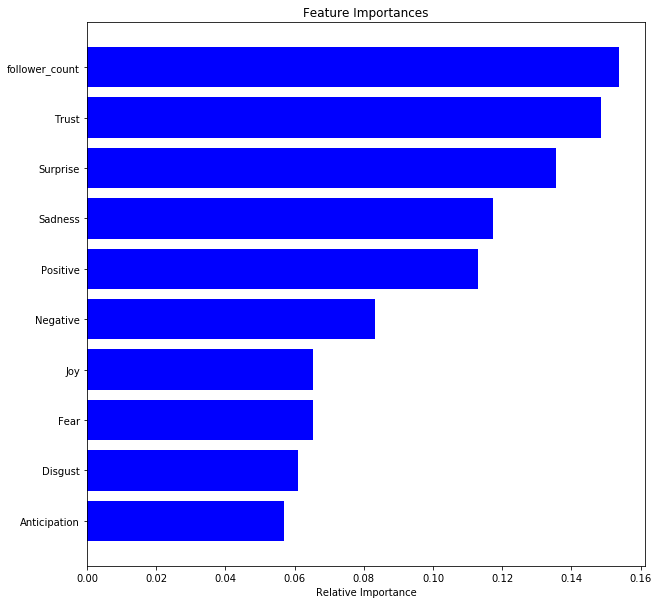

In [175]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model.feature_importances_
feature_names=df.columns
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),feature_names)
plt.xlabel('Relative Importance')